### 1. Import libraries

In [61]:
import pandas as pd
import numpy as np

In [76]:
data = pd.read_csv('../input/water-potability/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


as we notice that we have a missing values in 3 features

In [38]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [39]:
data.Potability.value_counts()


0    1998
1    1278
Name: Potability, dtype: int64

In [77]:
data= data.dropna()

In [78]:
data.Potability.value_counts()


0    1200
1     811
Name: Potability, dtype: int64

#### Not potable is much more potable(1200 > 811) so we need to balance the data to prevent  bias.


In [79]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200) 

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data) 


In [68]:
data.shape

(2400, 10)

In [69]:
data.Potability.value_counts()


0    1200
1    1200
Name: Potability, dtype: int64

## 2. EDA

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

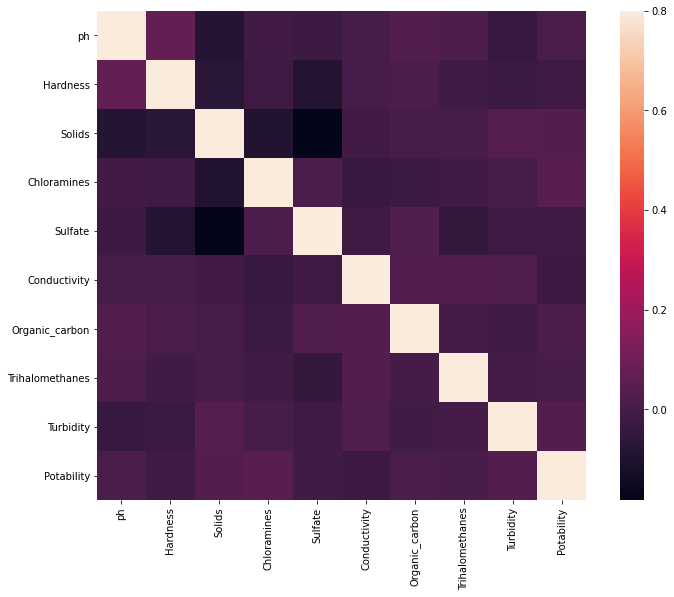

In [90]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


<AxesSubplot:>

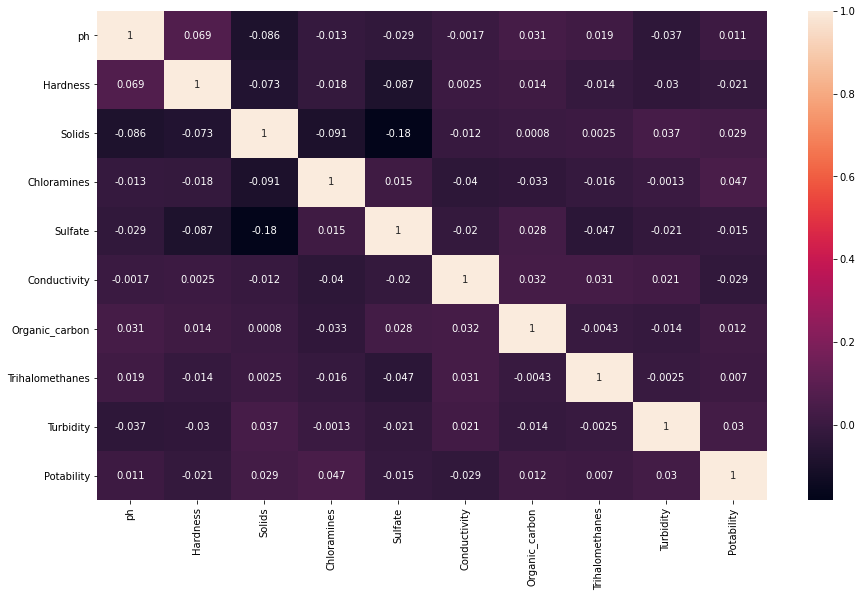

In [91]:
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True)


In [80]:
corr = data.corr()
corr["Potability"].sort_values(ascending=False)


Potability         1.000000
Chloramines        0.047350
Turbidity          0.029801
Solids             0.029467
Organic_carbon     0.012453
ph                 0.011134
Trihalomethanes    0.006956
Sulfate           -0.014745
Hardness          -0.020887
Conductivity      -0.028833
Name: Potability, dtype: float64

Solids have the highest correlation.

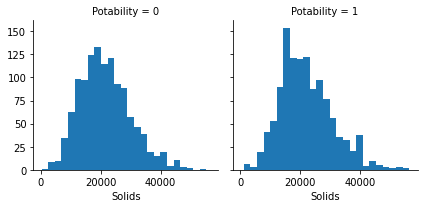

In [92]:
g = sns.FacetGrid(data, col='Potability')
g.map(plt.hist, 'Solids', bins=25)


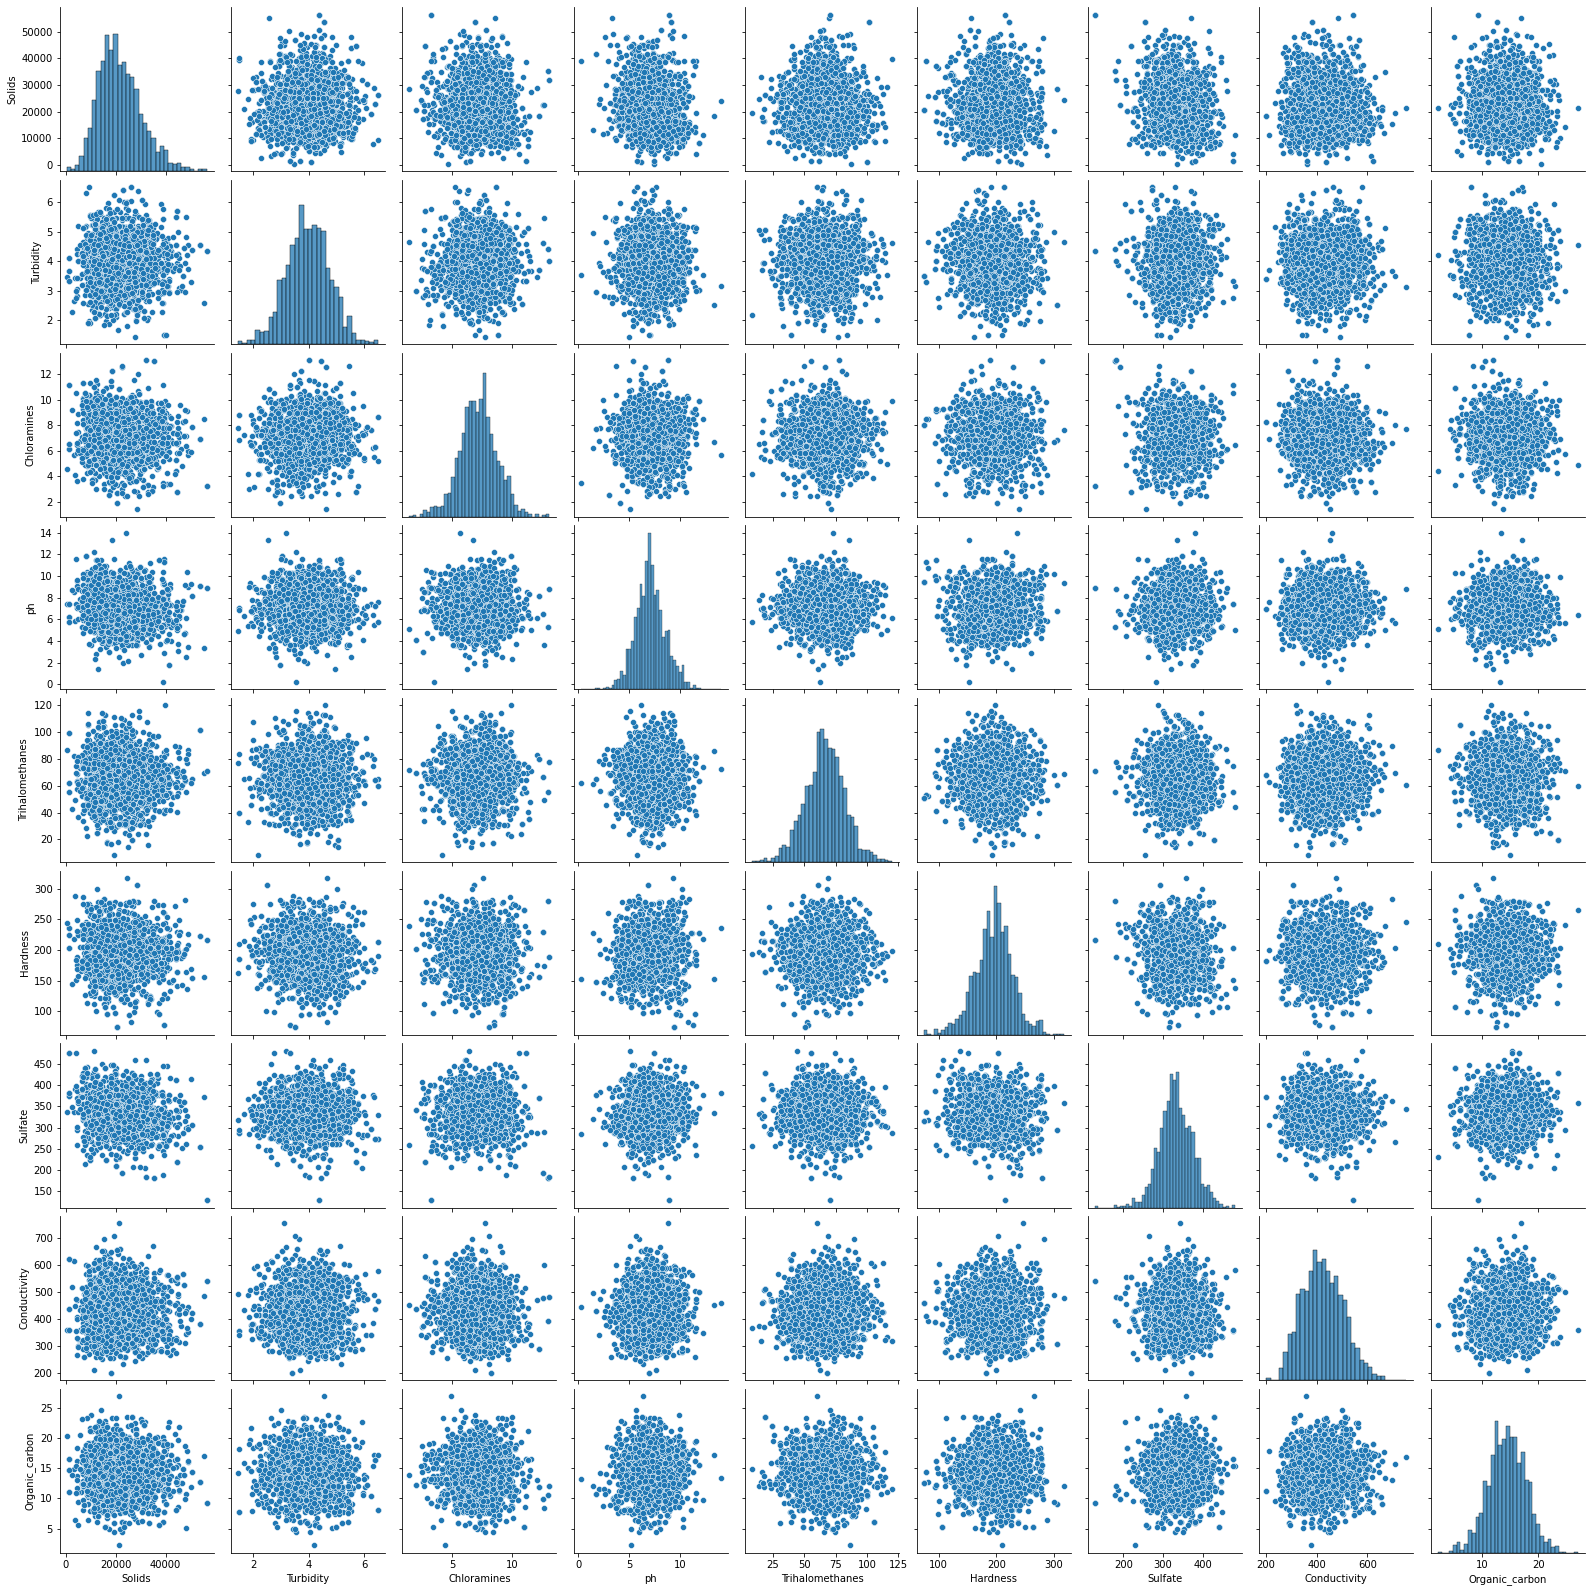

In [89]:
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']
sns.pairplot(data[cols])


## 3. Apply ML algorithms 

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score


In [83]:
x = data.drop(['Potability'], axis = 1)
y = data['Potability']


#### Applying StandardScaler befor fitting ML model to normalize the features.

In [84]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= x.columns
x[col] = st.fit_transform(x[col])
x[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2494,-0.685393,-0.935258,-1.381648,0.338443,0.415984,-0.623707,0.664246,-0.053346,-0.070259
2561,-0.666006,0.167612,-1.453444,1.380659,-0.180434,0.311903,-0.602236,0.474256,1.206052
359,0.260789,0.686160,-1.133454,-1.448024,1.749421,1.152125,0.799251,-0.609956,0.365419
908,2.098753,0.096761,-1.594035,-1.023586,-0.025937,1.766865,0.363889,-2.370889,0.765755
2994,-1.697550,-0.041056,0.681039,-0.173176,-0.063370,1.617877,2.439372,0.937600,1.271641
...,...,...,...,...,...,...,...,...,...
1147,0.509242,-0.396658,1.470634,-0.623130,-1.082355,-1.731475,-0.022783,0.535667,-0.616294
2023,-0.206122,0.189574,0.463398,1.368140,-0.129670,1.164552,0.978059,1.492155,1.577791
1353,2.920962,-0.360176,-2.056513,0.146477,1.552703,0.618807,-1.074686,0.191024,-1.259803
946,-0.761052,-0.259790,2.602902,-0.356146,0.200936,-1.877195,-0.502371,-0.436912,0.316837


#### Now data is ready to split.

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)


In [86]:
knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


In [87]:
grid_knn.fit(X_train, Y_train)
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
grid_ada.fit(X_train, Y_train)
rs_xgb.fit(X_train, Y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)


Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 50, 'learning_rate': 0.5}


In [88]:
models = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
          ('XGBoost', xgb)]


for model_name, model in models:
 
    model.fit(X_train, Y_train)    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy))


K Nearest Neighbours : 0.69
Decision Tree : 0.78
Random Forest : 0.88
AdaBoost : 0.60
XGBoost : 0.84


### Finally the best Model we can apply is RandomForest with accuracy 88%. 